# Titanic survived Project
**Project Description:**
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

**Attribute Information:**
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv


In [26]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("C://Users//rahul//OneDrive//Desktop//data trained//internship//Sample project//pro ph 2//titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data has missing/null values in "Age", "Cabin", "Embarked" column

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
#imputing missing/null values

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [33]:
# dropping "Cabin" column as it has high Null values
df.drop(columns=['Cabin'], inplace=True)

In [34]:
#Encoding categorical variable
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
le = LabelEncoder()

In [36]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

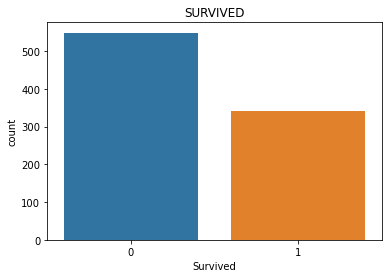

In [37]:
# plot the survived data
sns.countplot(x='Survived', data=df)
plt.title("SURVIVED")
plt.show()

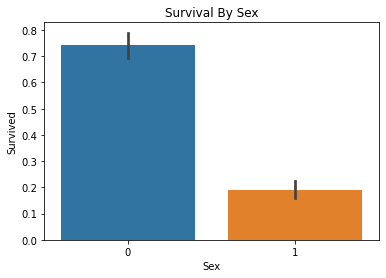

In [38]:
# By sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival By Sex")
plt.show()

In [39]:
# splitting the data into train and test
x = df.drop(['Survived','PassengerId', 'Name', 'Ticket'], axis=1)
y = df['Survived']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [42]:
#standardization of numerical features
sc = StandardScaler()

In [44]:
x_train[['Age','Fare']] = sc.fit_transform(x_train[['Age','Fare']])
#x_train['Fare'] = sc.fit_transform(x_train['Fare'])
x_test[['Age','Fare']] = sc.transform(x_test[['Age','Fare']])
#x_test['Fare'] = sc.transform(x_test['Fare'])

In [45]:
#Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.8100558659217877
Confusion Matrix:  [[90 15]
 [19 55]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [48]:
# Random forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.8044692737430168
Confusion Matrix:  [[89 16]
 [19 55]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [49]:
# Extra tree classifier
etc = ExtraTreeClassifier()
etc.fit(x_train, y_train)
pred = etc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.7877094972067039
Confusion Matrix:  [[80 25]
 [13 61]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.76      0.81       105
           1       0.71      0.82      0.76        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



In [50]:
# support vector classifier
svc=SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.8156424581005587
Confusion Matrix:  [[92 13]
 [20 54]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [51]:
# Gradient boosting
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.8100558659217877
Confusion Matrix:  [[93 12]
 [22 52]]
Classification Report:                precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [52]:
# Adaptive boost
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
pred = abc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.8044692737430168
Confusion Matrix:  [[88 17]
 [18 56]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [53]:
# Bagging classifier
bc = BaggingClassifier()
bc.fit(x_train, y_train)
pred = bc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.7821229050279329
Confusion Matrix:  [[86 19]
 [20 54]]
Classification Report:                precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



The SVC perform better compared to other evaluated model.